<a href="https://colab.research.google.com/github/Da-Seungheon/mini_project/blob/main/A/B%20Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize_matplotlib

%config lineBackendin.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 47.5 MB/s eta 0:00:00


In [ ]:
data_path = '/content/drive/MyDrive/04_코드잇csv/30%20Day%20Subscription%20Data.csv'
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,Date,Total Users,Subscribers,1-Month Subscribers,12-Month Subscribers,Revenue,Group,Conversion Rate,1-Month Revenue,12-Month Revenue
0,0,2023.9.15,459,22,19,3,1547,A,0.047930,665,882
1,1,2023.9.16,504,26,21,5,2205,A,0.051587,735,1470
2,2,2023.9.17,514,26,22,4,1946,A,0.050584,770,1176
3,3,2023.9.18,482,23,19,4,1841,A,0.047718,665,1176
4,4,2023.9.19,512,25,19,6,2429,A,0.048828,665,1764


In [ ]:
df['Group'].value_counts()

,count
Group,
A,30
B,30


- 실험 개요
    - A안(기존안) : 1개월 및 12개월 맴버십 가격을 단순 비교하여 보여줌
    - B안(변경안) : 12개월 맴버십의 월간 가격을 가종하여, 더 경제적인 선택이라는 점을 부각

- 실험 가설
    - <mark>12개월 맴버십의 월간 가격을 보여줌으로써, 사용자들이 더 경제적인 12개월 맴버십을 선택할 가능성이 높아질 것이다.
- 기존 지표
    - <mark>A안(기존안)에서는 1개월 구독 비율이 83%, 12개월 구독 비율이 17%였습니다.
- 데이터 개요 : 30일 동안 일별 데이터를 수집
    - 페이지 방문 수
    - 구독 전환율 : 페이지 방문자 중 실제 구독을 완료한 비율
    - 구독자 수 : 1개월 및 12개월 구독자 수
    - 수익 : 실험안에서 발생한 총 수익

- 실험 기간
    -2023년 9월 15일 ~ 2023년 10월 14일(30일)


---

- 분석 방법 : 시험 데이터를 날짜별로 분석하여 두 가지 실험안 간의 차이를 파악합니다. 주요 분석 항목은 다음과 같음
    - 1개월 구독자 수 변화 : 날짜별로 1개월 구독을 선택한 사용자 수의 변동을 확인
    - 12개월 구독자 수 변화 : 12개월 구독을 선택한 사용자 수가 B안에서 증가하는지 확인
    - 수익 변화 : 두 실험안에서 발생한 수익을 날짜별로 비교

- 데이터 시각화
    - 1개월 및 12개월 구독자 수와 수익을 날짜별로 시각화하여, 실험 기간 동안의 변동성을 파악합니다. 이를 통해 두 실험안의 성과 차이를 시각적으로 확인할 수 있습니다.
- 통계적 분석
    - 전환율 비교 : 두 실험안의 구독 전환율이 유의미하게 다른지 확인
    - 구독 비율 비교 : 12개월 구독 비율이 B안에서 증가했는지 확인
    - 수익 비교 : 1인당 기대 수익이 B안에서 더 높은지 확인

---

- 결과 도출
    - 구독 전환율 : B안에서 구독 전환율이 상승하는지 확인하고 B안의 가설에 따라 전환율이 A안보다 더 높아야 합니다.
    - 1개월 vs 12개월 구독자 비율 : B안에서 12개월 구독 비율이 유의미하게 증가했는지 확인
    - 수익 변회 : 두 실험안에서 발생한 총 수익을 비교하여, B안이 A안에 비해 더 많은 수익을 창출 했는지 분석합니다

- 의사 결정
    - 실험안 채택 : B안이 A안보다 유의미한 성과를 보였다면, B안을 채택하여 12개월 맴버십 구독을 유도할 수 있습니다.
    - 추가 실험 필요 : B안에서의 유의미한 변화가 나타나지 않았다면, 추가 실험을 진행하여 다른 변수를 테스트할 필요가 있습니다

---

# 데이터 파악

In [ ]:
df.head()

,Unnamed: 0,Date,Total Users,Subscribers,1-Month Subscribers,12-Month Subscribers,Revenue,Group,Conversion Rate,1-Month Revenue,12-Month Revenue
0,0,2023.9.15,459,22,19,3,1547,A,0.047930,665,882
1,1,2023.9.16,504,26,21,5,2205,A,0.051587,735,1470
2,2,2023.9.17,514,26,22,4,1946,A,0.050584,770,1176
3,3,2023.9.18,482,23,19,4,1841,A,0.047718,665,1176
4,4,2023.9.19,512,25,19,6,2429,A,0.048828,665,1764


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            60 non-null     int64  
 1   Date                  60 non-null     object 
 2   Total Users           60 non-null     int64  
 3   Subscribers           60 non-null     int64  
 4   1-Month Subscribers   60 non-null     int64  
 5   12-Month Subscribers  60 non-null     int64  
 6   Revenue               60 non-null     int64  
 7   Group                 60 non-null     object 
 8   Conversion Rate       60 non-null     float64
 9   1-Month Revenue       60 non-null     int64  
 10  12-Month Revenue      60 non-null     int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 5.3+ KB


# 데이터 분석


In [ ]:
# 날짜 데이터를 데아트형태로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 그룹 A/B 별로 데이터 나누기
group_data = df.groupby(['Date', 'Group'],as_index=False).agg({
    '1-Month Subscribers' : 'sum',
    '12-Month Subscribers'  : 'sum',
    'Revenue' : 'sum'
})

# 각 그룹으로 나누어서 분석 준비
group_a = group_data[group_data['Group'] == 'A']
group_b = group_data[group_data['Group'] == 'B']

group_a.tail(), group_b.tail()

(         Date Group  1-Month Subscribers  12-Month Subscribers  Revenue
 50 2023-10-10     A                   23                     8     3157
 52 2023-10-11     A                   19                     3     1547
 54 2023-10-12     A                   21                     2     1323
 56 2023-10-13     A                   24                     7     2898
 58 2023-10-14     A                   22                     5     2240,
          Date Group  1-Month Subscribers  12-Month Subscribers  Revenue
 51 2023-10-10     B                   28                     6     2744
 53 2023-10-11     B                   27                     8     3297
 55 2023-10-12     B                   28                     6     2744
 57 2023-10-13     B                   27                     8     3297
 59 2023-10-14     B                   22                     7     2828)

## 1. 1개월 구둑자 수 변화 : 날짜별로 1개월 구독을 선택한 사용자 수의 변동 그래프

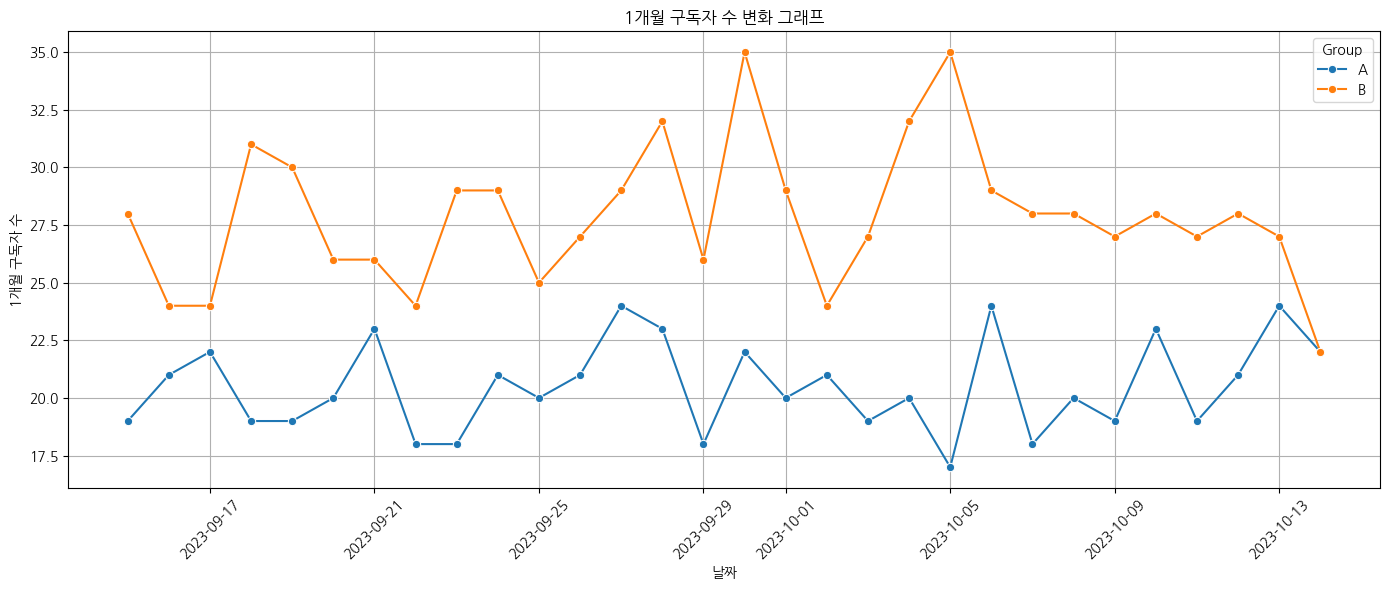

In [ ]:
# 1개월 구독자 수 변화 그래프
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=group_data, x='Date' , y='1-Month Subscribers', hue='Group', marker='o')
plt.title('1개월 구독자 수 변화 그래프')
plt.xlabel('날짜')
plt.ylabel('1개월 구독자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- B안이 전반적으로 A안보다 더 많은 구독자를 확보하고 있음을 보여줌
- 구독자 수는 날짜별로 뚜렷한 변동성을 나타내며 B안의 성과가 두드러짐
- 10월1일에서 10월 5일에 넘어가면서 구독자 수가 급격하게 높아지는 것을 알 수 있음
    - 해당 기간을 좀 더 깊게 분석할 필요가 있어보임
    - 반대로 9월29일과 10월1일 사이에는 구독수가 감소한 것으로 보여 좀 더 깊은 분석이 필요

## 2. 12개월 구둑자 수 변화 : 날짜별로 1개월 구독을 선택한 사용자 수의 변동 그래프

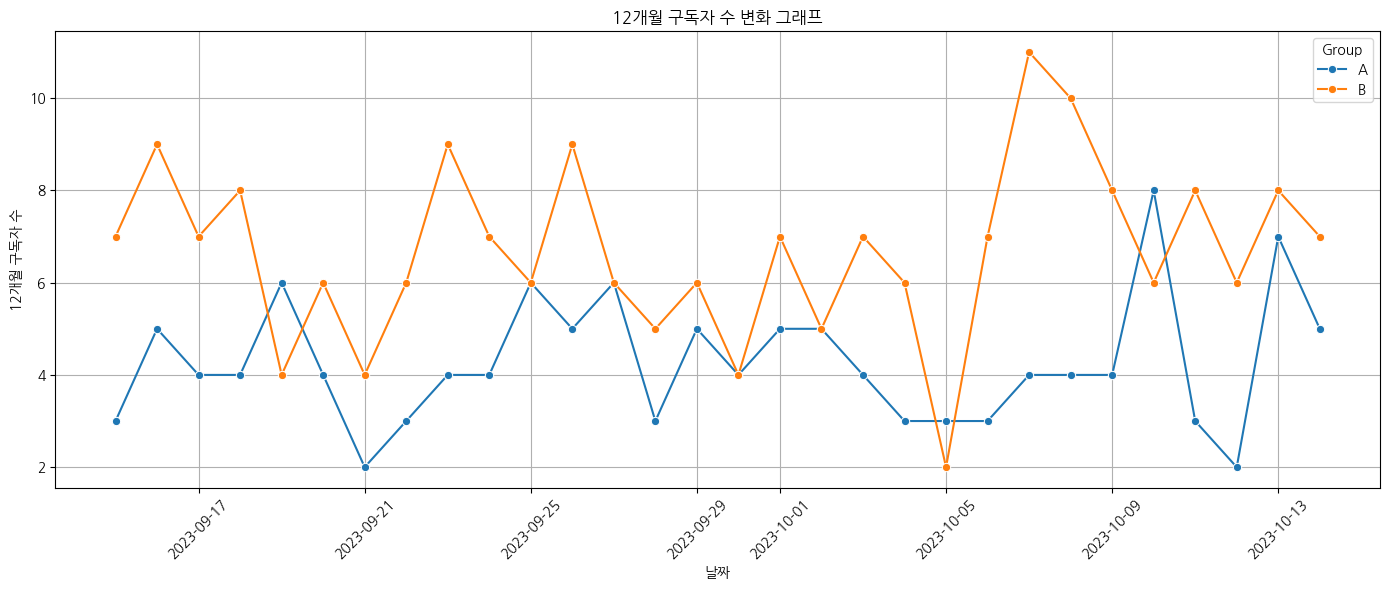

In [ ]:
# 12개월 구독자 수 변화 그래프
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=group_data, x='Date', y='12-Month Subscribers', hue='Group', marker='o')
plt.title('12개월 구독자 수 변화 그래프')
plt.xlabel('날짜')
plt.ylabel('12개월 구독자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- B안은 특정 기간 동안 높은 성과를 보이지만, 날짜에 따라 변동 폭이 다소 큰 편
- A안은 안정적이나 상대적으로 낮은 성과를 보여줌

## 날짜 별 수익 변화 그래프

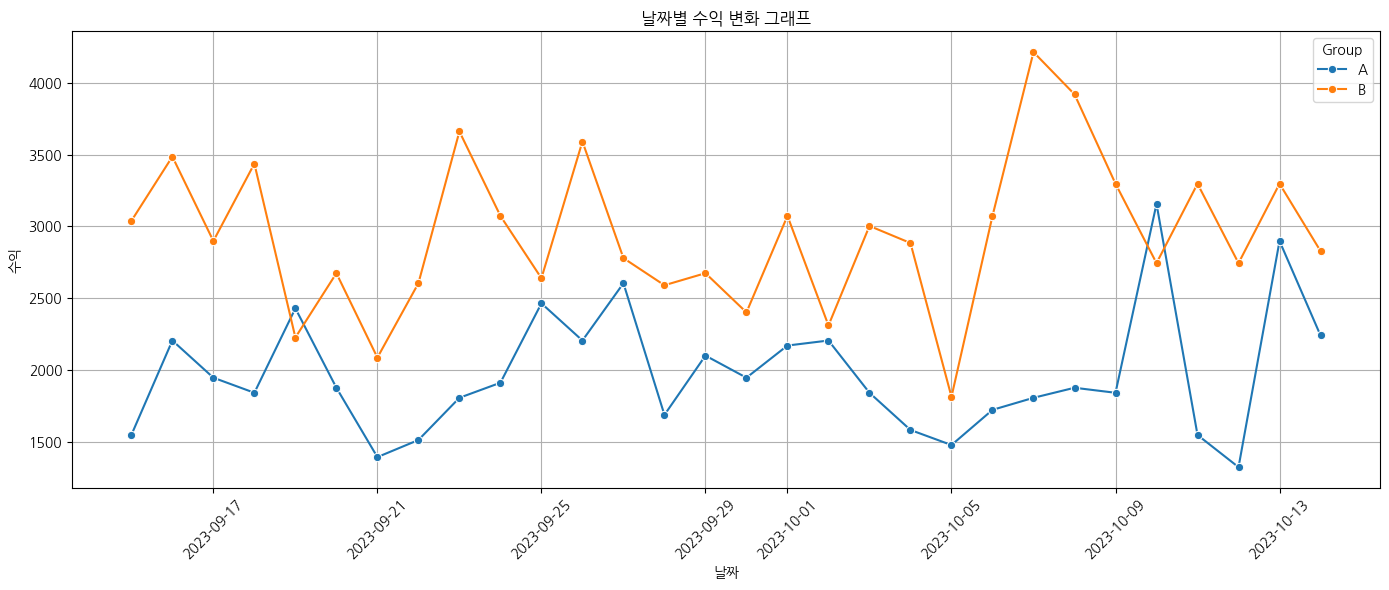

In [ ]:
# 그룹별 날짜별 수익 변화 그래프
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=group_data, x='Date', y='Revenue', hue='Group', marker='o')
plt.title('날짜별 수익 변화 그래프')
plt.xlabel('날짜')
plt.ylabel('수익')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- B안의 수익이 대체로 A안보다 높은 수준을 유지하고 있으며, 날짜별로 뚜렷한 차이를 나타냄
- 특정 날짜에서 B안이 특히 높은 수익을 기록하는 것을 확인할 수 있음

## 전환율을 날짜별로 그룹화하여 분석하기

In [ ]:
group_data.head(1)

,Date,Group,1-Month Subscribers,12-Month Subscribers,Revenue
0,2023-09-15,A,19,3,1547


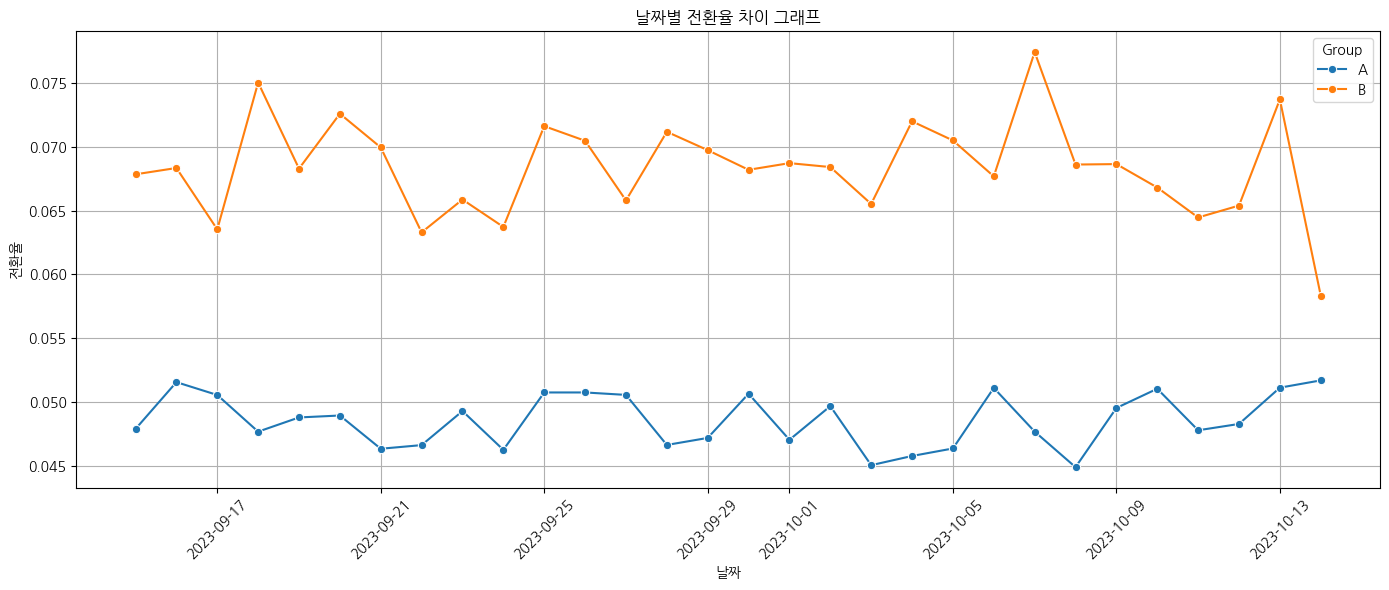

In [ ]:
# 날짜별로 그룹화하여 전환율 평균값 구하기
conversion_group = df.groupby(['Date', 'Group'], as_index=False).agg({
    'Conversion Rate' : 'mean'
})

conver_a = conversion_group[conversion_group['Group'] == 'A']
conver_b = conversion_group[conversion_group['Group'] == 'B']

# 전환율 차이 그래프 시각화
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=conversion_group, x='Date', y='Conversion Rate', hue='Group', marker='o')
plt.title('날짜별 전환율 차이 그래프')
plt.xlabel('날짜')
plt.ylabel('전환율')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- 전반적으로 B안의 전환율이 A안보다 높은 경향을 보이며, 이는 B안의 마케팅 전략이나 제품이 사용자를 구독자로 전환시키는 데 더 효과적임을 시사합니다
- B안에서 일부 날짜에 매우 높은 전환율을 보이는 현상이 관찰됩니다
- 따라 B안에 A안 보다 더 효과적임을 알 수 있습니다

---

## 통계적 검정

- 전환율 차이가 유연에 의해 발생한 것인지 Z-test를 통해 검증해보자

In [ ]:
sub_result = df.groupby('Group')['Subscribers'].sum()
sub_result

,Subscribers
Group,
A,743
B,1037


In [ ]:
user_result = df.groupby('Group')['Total Users'].sum()
user_result

,Total Users
Group,
A,15265
B,15182


In [ ]:
# 라이브러리 불러오기
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [ ]:
count = [743, 1037]
group_count = [15265, 15182]

In [ ]:
# z-test 실행 : 양측 검정을 수행하는 코드
z_stats, p_value = proportions_ztest(count, group_count, alternative='two-sided')

In [ ]:
print(f'z_stats : {z_stats:.3f}')
print(f'p_value : {p_value:.3f}')

z_stats : -7.300
p_value : 0.000


In [ ]:
# 전환 데이터
count = [743, 1037]
group_count = [15265, 15182]

z_stats, p_value = proportions_ztest(count, group_count, alternative='two-sided')

print(f'z_stats : {z_stats:.3f}')
print(f'p_value : {p_value:.3f}')

if p_value < 0.05:
    print('두 그룹 전환율의 차이는 통계적으로 유의미합니다')
else:
    print('두 그룹 전환율의 차이는 통계적으로 유의미 하지 않습니다')

z_stats : -7.300
p_value : 0.000
두 그룹 전환율의 차이는 통계적으로 유의미합니다


- A안과 B안의 전환율에서 차이가 있으며, 그 차이는 통계적으로 유의미하다

---

In [ ]:
# 2. 12개월 구독 비율 비교를 위한 z-test
sub_result_12 = df.groupby('Group')['12-Month Subscribers'].sum()
sub_result_12

,12-Month Subscribers
Group,
A,128
B,201


In [ ]:
sub_result

,Subscribers
Group,
A,743
B,1037


In [ ]:
# 2. 12개월 구독 비율 비교를 위한 z-test
count = [128, 201]
total_count= [743, 1037]

z_stats, p_value = proportions_ztest(count, total_count, alternative='two-sided')

print(f'z_stats : {z_stats:.3f}')
print(f'p_value : {p_value:.3f}')

if p_value < 0.05:
    print('두 그룹 전환율의 차이는 통계적으로 유의미합니다')
else:
    print('두 그룹 전환율의 차이는 통계적으로 유의미 하지 않습니다')

z_stats : -1.155
p_value : 0.248
두 그룹 전환율의 차이는 통계적으로 유의미 하지 않습니다


- A안과 B안의 12개월 구독자 비율의 차이는 있지만 그 차이는 통계적으로 유의미 하지 않다

In [ ]:
# A안과 B안의 총 수익
df.groupby('Group')['Revenue'].sum()

,Revenue
Group,
A,59157
B,88354


In [ ]:
# 그룹간 총 매출 차이가 우연에 의해 발생한 것인지 Z-test를 통해 검증
count = [59157, 88354]
total_count = [147511, 147511]


z_stat, p_value = proportions_ztest(count, total_count)

# 결과 출력
print(f'Z-Score: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

if p_value < 0.05:
    print('두 그룹의 매출 비율 차이는 유의미합니다. (p < 0.05)')
else:
    print('두 그룹의 매출 비율 차이는 유의미하지 않습니다. (p >= 0.05)')

Z-Score: -107.5081
P-Value: 0.0000
두 그룹의 매출 비율 차이는 유의미합니다. (p < 0.05)
